In [1]:
import pandas as pd
train=pd.read_csv("Covid Data.csv")
train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [2]:
display(train.head())

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
print("\nThe dataset consists of {} rows and {} columns".format(train.shape[0], train.shape[1]))


The dataset consists of 1048575 rows and 21 columns


In [4]:
import pandas as pd

# Scipy for some statistical calculations
from scipy.stats import pearsonr

# Numpy for working with arrays
import numpy as np
from numpy import isnan

# Sklearn for imputing missing values and model building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Matplotlib for plotting 
import matplotlib.pyplot as plt

# Seaborn for colorful plotting
import seaborn as sns

# imblearn for undersampling 
from imblearn.under_sampling import RandomUnderSampler

In [5]:
#Data Cleaning by removing the patient details who are not affected in covid19

In [6]:
percent_positive=round(sum(train.CLASIFFICATION_FINAL<4)/len(train.CLASIFFICATION_FINAL),3)*100
print("patients are affected in covid-19 are",format(percent_positive),"%")
train_COVID=train[train.CLASIFFICATION_FINAL<4]
print(train_COVID.shape)

patients are affected in covid-19 are 37.4 %
(391979, 21)


In [7]:
#Handling the missing values in the dataset

In [8]:
for i in range(len(train_COVID.columns)):
    print("The value counts for the column\n",format(train_COVID.columns[i]),"are")
    display(train_COVID[train_COVID.columns[i]].value_counts())

The value counts for the column
 USMER are


2    244853
1    147126
Name: USMER, dtype: int64

The value counts for the column
 MEDICAL_UNIT are


12    208226
4     126649
6      17688
9      14585
3       8631
8       4994
10      3807
11      3735
5       2853
7        414
13       345
1         40
2         12
Name: MEDICAL_UNIT, dtype: int64

The value counts for the column
 SEX are


2    209489
1    182490
Name: SEX, dtype: int64

The value counts for the column
 PATIENT_TYPE are


1    280687
2    111292
Name: PATIENT_TYPE, dtype: int64

The value counts for the column
 DATE_DIED are


9999-99-99    337743
13/07/2020       787
06/07/2020       773
16/07/2020       761
07/07/2020       758
               ...  
20/02/2021         1
18/02/2021         1
11/02/2021         1
10/02/2021         1
17/04/2021         1
Name: DATE_DIED, Length: 288, dtype: int64

The value counts for the column
 INTUBED are


97    280687
2      86109
1      23670
99      1513
Name: INTUBED, dtype: int64

The value counts for the column
 PNEUMONIA are


2     305934
1      86041
99         4
Name: PNEUMONIA, dtype: int64

The value counts for the column
 AGE are


37     9019
45     8925
40     8909
30     8899
46     8891
       ... 
119       1
116       1
104       1
120       1
106       1
Name: AGE, Length: 110, dtype: int64

The value counts for the column
 PREGNANT are


97    209489
2     178353
1       2754
98      1383
Name: PREGNANT, dtype: int64

The value counts for the column
 DIABETES are


2     328425
1      62114
98      1440
Name: DIABETES, dtype: int64

The value counts for the column
 COPD are


2     384535
1       6131
98      1313
Name: COPD, dtype: int64

The value counts for the column
 ASTHMA are


2     380258
1      10412
98      1309
Name: ASTHMA, dtype: int64

The value counts for the column
 INMSUPR are


2     385757
1       4773
98      1449
Name: INMSUPR, dtype: int64

The value counts for the column
 HIPERTENSION are


2     313864
1      76727
98      1388
Name: HIPERTENSION, dtype: int64

The value counts for the column
 OTHER_DISEASE are


2     379825
1      10018
98      2136
Name: OTHER_DISEASE, dtype: int64

The value counts for the column
 CARDIOVASCULAR are


2     382082
1       8506
98      1391
Name: CARDIOVASCULAR, dtype: int64

The value counts for the column
 OBESITY are


2     317852
1      72774
98      1353
Name: OBESITY, dtype: int64

The value counts for the column
 RENAL_CHRONIC are


2     382677
1       7952
98      1350
Name: RENAL_CHRONIC, dtype: int64

The value counts for the column
 TOBACCO are


2     361798
1      28747
98      1434
Name: TOBACCO, dtype: int64

The value counts for the column
 CLASIFFICATION_FINAL are


3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

The value counts for the column
 ICU are


97    280687
2      99322
1      10449
99      1521
Name: ICU, dtype: int64

In [9]:
#Dropping the rows with missing values
miss_columns = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
               'RENAL_CHRONIC', 'TOBACCO']

for i in range(len(miss_columns)):
    train_COVID = train_COVID[(train_COVID[miss_columns[i]] == 1) | (train_COVID[miss_columns[i]] == 2)]
#Drop the columns Intubed and Icu as they have more missing values than others

drop_columns_indices = [train_COVID.columns.get_loc('INTUBED'), train_COVID.columns.get_loc('ICU')]
train_COVID.drop(columns=train_COVID.columns[drop_columns_indices], inplace=True)

In [10]:
print(train_COVID.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')


In [11]:
print(train_COVID.head())  # Check the first few rows of the DataFrame


   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA  AGE  \
0      2             1    1             1  03/05/2020          1   65   
2      2             1    2             2  09/06/2020          2   55   
4      2             1    2             1  21/06/2020          2   68   
5      2             1    1             2  9999-99-99          1   40   
6      2             1    1             1  9999-99-99          2   64   

   PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0         2         2     2       2        2             1              2   
2        97         1     2       2        2             2              2   
4        97         1     2       2        2             1              2   
5         2         2     2       2        2             2              2   
6         2         2     2       2        2             2              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  
0               2      

In [12]:
# Separating pregnancy values for men from those from women
male_preg = train_COVID.PREGNANT[train_COVID.SEX == 2]
female_preg = train_COVID.PREGNANT[train_COVID.SEX == 1]

# Identifying the unique values in the above two groups
print("The values of PREGNANT for men are: {}".format(male_preg.unique()))
print("The values of PREGNANT for women are: {}".format(female_preg.unique()))

# All men are given the value of 97 for PREGNANT. We'll change this to 2
train_COVID.PREGNANT[train_COVID.PREGNANT == 97] = 2

# Removing the rows that don't equal 1 or 2
train_COVID = train_COVID[(train_COVID.PREGNANT == 1) | (train_COVID.PREGNANT == 2)]

# Check the updated values
male_preg = train_COVID.PREGNANT[train_COVID.SEX == 2]
female_preg = train_COVID.PREGNANT[train_COVID.SEX == 1]
print("\nThe updated values of PREGNANT for men are: {}".format(male_preg.unique()))
print("The updated values of PREGNANT for women are: {}".format(female_preg.unique()))

The values of PREGNANT for men are: [97]
The values of PREGNANT for women are: [ 2  1 98]

The updated values of PREGNANT for men are: [2]
The updated values of PREGNANT for women are: [2 1]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15376\3469771146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_COVID.PREGNANT[train_COVID.PREGNANT == 97] = 2


In [13]:
##will change the column data died so that it will be converted to binary. here who have survived they are treated as 1 and who don't 2

In [14]:
train_COVID.DATE_DIED[train_COVID.DATE_DIED == '9999-99-99'] = 1
train_COVID.DATE_DIED[train_COVID.DATE_DIED != 1] = 2

# Rename DATE_DIED as SURVIVED
train_COVID.rename(columns={'DATE_DIED': 'SURVIVED'}, inplace=True)

# Number of people who survived / died and their percentages
survived = sum(train_COVID.SURVIVED == 1)
survived_percent = round(survived / len(train_COVID.SURVIVED), 3) * 100
died = sum(train_COVID.SURVIVED == 2)
died_percent = round(died / len(train_COVID.SURVIVED), 3) * 100

print("{} people ({}%) survived COVID-19 infection.".format(survived, survived_percent))
print("{} people ({}%) died of COVID-19 infection.".format(died, died_percent))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15376\1953463046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_COVID.DATE_DIED[train_COVID.DATE_DIED != 1] = 2


334274 people (86.2%) survived COVID-19 infection.
53322 people (13.8%) died of COVID-19 infection.


In [15]:
#Exploratory data analysis

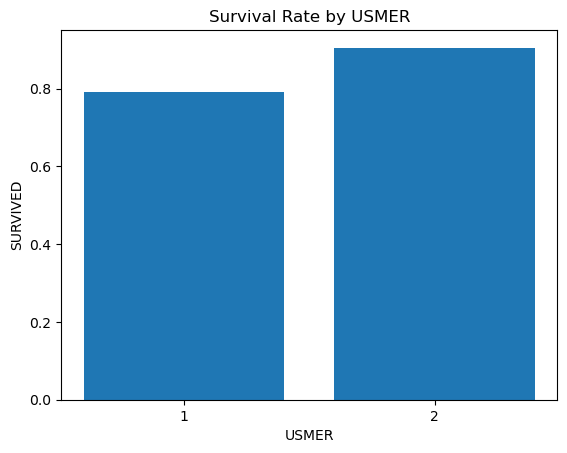

145693 patients were in group 1.
241903 patients were in group 2.


In [16]:
# USMER Survival plot
USMER_surv = []
for i in range(1, train_COVID.USMER.max() + 1):
    surv = train_COVID[train_COVID.USMER == i]["SURVIVED"] == 1
    USMER_surv.append(sum(surv) / len(surv))

# Ploting Survival rate by USMER value
plt.bar(range(1, train_COVID.USMER.max() + 1), USMER_surv, tick_label=[1, 2])
plt.xlabel("USMER")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by USMER")
plt.show()

# No. of patients in each group.
for i in range(1, train_COVID.USMER.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.USMER == i]["SURVIVED"] == 1), i))

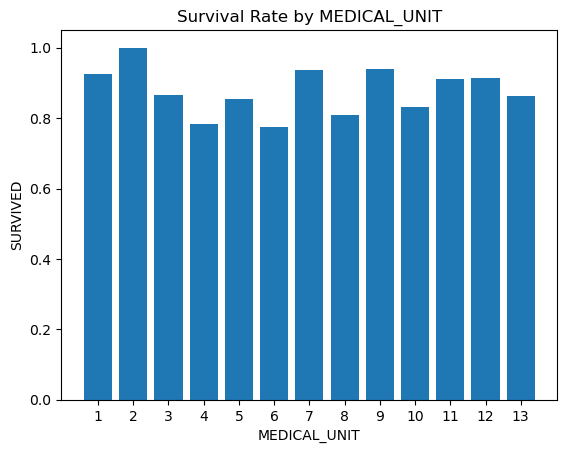

40 patients were in group 1.
12 patients were in group 2.
8581 patients were in group 3.
126409 patients were in group 4.
2847 patients were in group 5.
17358 patients were in group 6.
409 patients were in group 7.
4931 patients were in group 8.
14017 patients were in group 9.
3678 patients were in group 10.
3730 patients were in group 11.
205242 patients were in group 12.
342 patients were in group 13.


In [17]:
# MEDICAL_UNIT Survival plot
MEDICAL_surv = []
for i in range(1, train_COVID.MEDICAL_UNIT.max() + 1):
    surv = train_COVID[train_COVID.MEDICAL_UNIT == i]["SURVIVED"] == 1
    MEDICAL_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.MEDICAL_UNIT.max() + 1), MEDICAL_surv, tick_label=range(1, train_COVID.MEDICAL_UNIT.max() + 1))
plt.xlabel("MEDICAL_UNIT")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by MEDICAL_UNIT")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.MEDICAL_UNIT.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.MEDICAL_UNIT == i]["SURVIVED"] == 1), i))

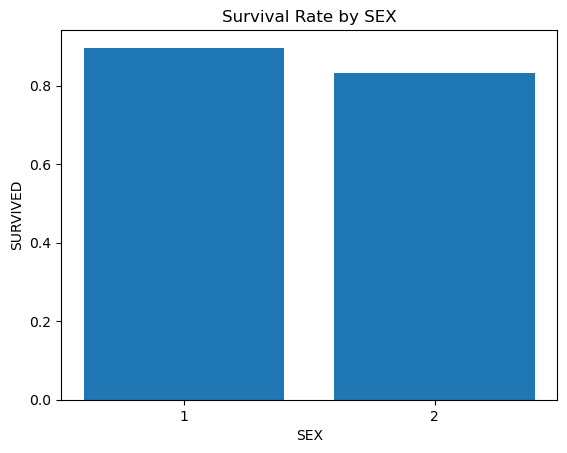

180002 patients were in group 1.
207594 patients were in group 2.


In [18]:
# SEX Survival plot
SEX_surv = []
for i in range(1, train_COVID.SEX.max() + 1):
    surv = train_COVID[train_COVID.SEX == i]["SURVIVED"] == 1
    SEX_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.SEX.max() + 1), SEX_surv, tick_label=range(1, train_COVID.SEX.max() + 1))
plt.xlabel("SEX")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by SEX")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.SEX.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.SEX == i]["SURVIVED"] == 1), i))

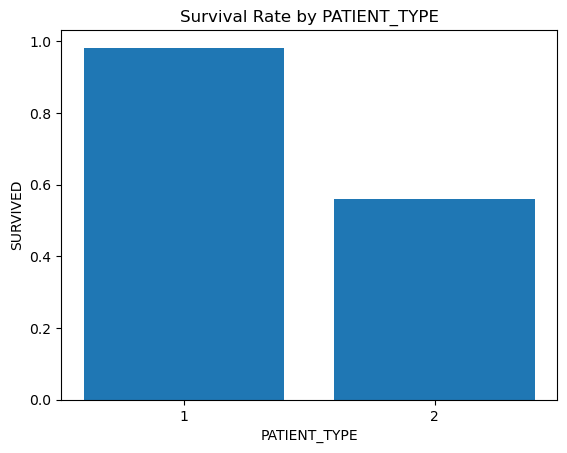

277940 patients were in group 1.
109656 patients were in group 2.


In [19]:
# PATIENT_TYPE Survival plot
PATIENT_surv = []
for i in range(1, train_COVID.PATIENT_TYPE.max() + 1):
    surv = train_COVID[train_COVID.PATIENT_TYPE == i]["SURVIVED"] == 1
    PATIENT_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.PATIENT_TYPE.max() + 1), PATIENT_surv, tick_label=range(1, train_COVID.PATIENT_TYPE.max() + 1))
plt.xlabel("PATIENT_TYPE")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by PATIENT_TYPE")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.PATIENT_TYPE.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.PATIENT_TYPE == i]["SURVIVED"] == 1), i))

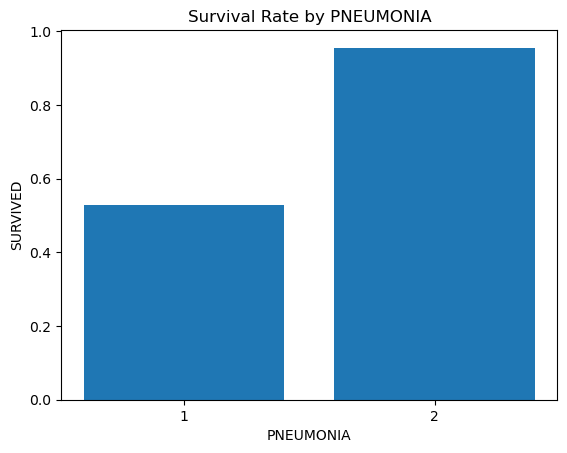

84664 patients were in group 1.
302932 patients were in group 2.


In [20]:
# PNEUMONIA Survival plot
PNEUMONIA_surv = []
for i in range(1, train_COVID.PNEUMONIA.max() + 1):
    surv = train_COVID[train_COVID.PNEUMONIA == i]["SURVIVED"] == 1
    PNEUMONIA_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.PNEUMONIA.max() + 1), PNEUMONIA_surv, tick_label=range(1, train_COVID.PNEUMONIA.max() + 1))
plt.xlabel("PNEUMONIA")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by PNEUMONIA")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.PNEUMONIA.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.PNEUMONIA == i]["SURVIVED"] == 1), i))

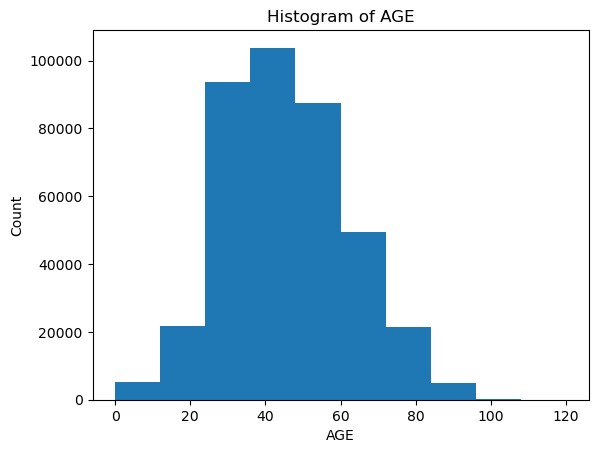

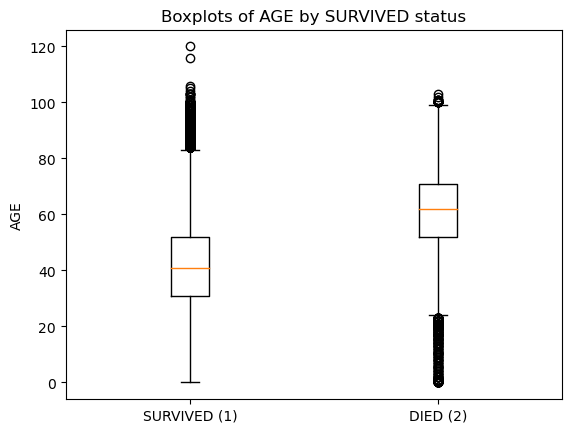


Mean age of all patients: 45.2 years

Mean age of those who survived: 42.5 years

Mean age of those who died: 61.5 years


In [21]:
# Histogram of ages of all patients
plt.hist(train_COVID.AGE)
plt.xlabel("AGE")
plt.ylabel("Count")
plt.title("Histogram of AGE")
plt.show()

# Boxplots of AGE by SURVIVED status
AGE_SURVIVED = train_COVID[train_COVID.SURVIVED == 1].AGE
AGE_DIED = train_COVID[train_COVID.SURVIVED == 2].AGE
plt.boxplot(x=[AGE_SURVIVED, AGE_DIED], labels=['SURVIVED (1)', 'DIED (2)'])
plt.ylabel("AGE")
plt.title("Boxplots of AGE by SURVIVED status")
plt.show()

# Mean age for each group
print("\nMean age of all patients: {} years".format(round(sum(train_COVID.AGE) / 
                                                    len(train_COVID.AGE), 1)))
print("\nMean age of those who survived: {} years".format(round(sum(train_COVID[train_COVID.SURVIVED == 1].AGE) / 
                                                    len(train_COVID[train_COVID.SURVIVED == 1].AGE), 1)))
print("\nMean age of those who died: {} years".format(round(sum(train_COVID[train_COVID.SURVIVED == 2].AGE) / 
                                                    len(train_COVID[train_COVID.SURVIVED == 2].AGE), 1)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15376\3994431307.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surv = train_COVID[train_COVID.SEX == 1][train_COVID.PREGNANT == i]["SURVIVED"] == 1


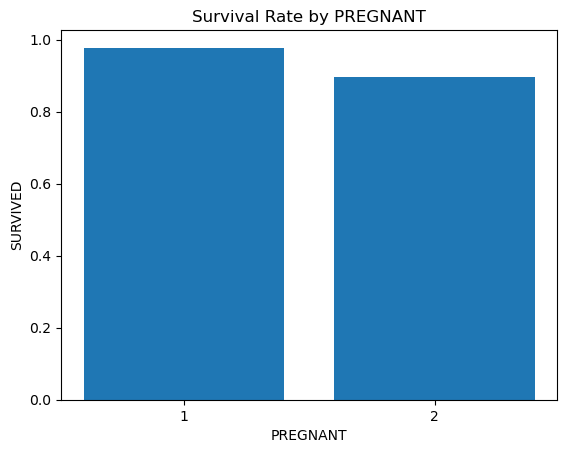

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15376\3994431307.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("{} patients were in group {}.".format(len(train_COVID[train_COVID.SEX == 1][train_COVID.PREGNANT == i]["SURVIVED"] == 1), i))


2744 patients were in group 1.
177258 patients were in group 2.


In [22]:
# PREGNANT Survival plot; only include women (SEX == 1)
PREGNANT_surv = []
for i in range(1, train_COVID.PREGNANT.max() + 1):
    surv = train_COVID[train_COVID.SEX == 1][train_COVID.PREGNANT == i]["SURVIVED"] == 1
    PREGNANT_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.PREGNANT.max() + 1), PREGNANT_surv, tick_label=range(1, train_COVID.PREGNANT.max() + 1))
plt.xlabel("PREGNANT")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by PREGNANT")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.PREGNANT.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.SEX == 1][train_COVID.PREGNANT == i]["SURVIVED"] == 1), i))

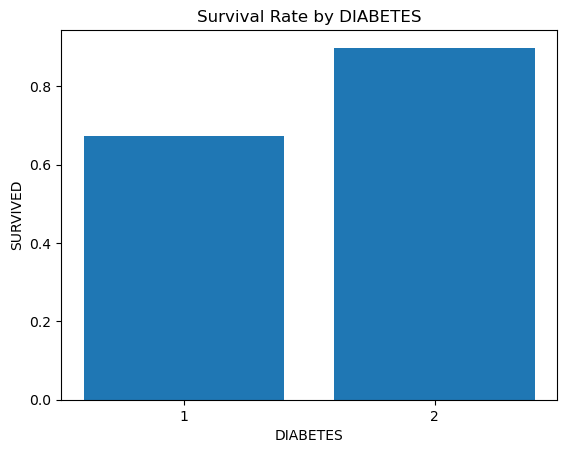

61548 patients were in group 1.
326048 patients were in group 2.


In [23]:
# DIABETES Survival plot
DIABETES_surv = []
for i in range(1, train_COVID.DIABETES.max() + 1):
    surv = train_COVID[train_COVID.DIABETES == i]["SURVIVED"] == 1
    DIABETES_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.DIABETES.max() + 1), DIABETES_surv, tick_label=range(1, train_COVID.DIABETES.max() + 1))
plt.xlabel("DIABETES")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by DIABETES")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.DIABETES.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.DIABETES == i]["SURVIVED"] == 1), i))

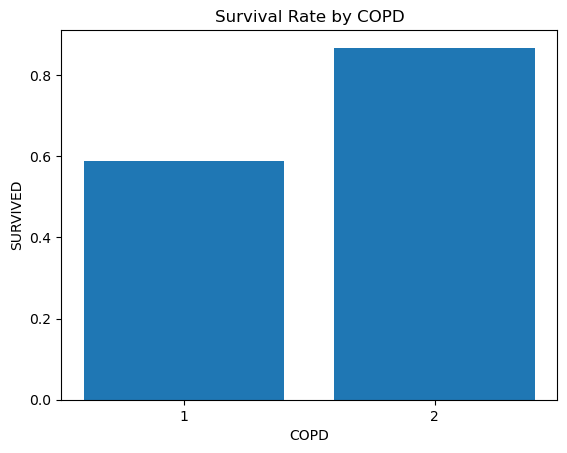

6068 patients were in group 1.
381528 patients were in group 2.


In [24]:
# COPD Survival plot
COPD_surv = []
for i in range(1, train_COVID.COPD.max() + 1):
    surv = train_COVID[train_COVID.COPD == i]["SURVIVED"] == 1
    COPD_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.COPD.max() + 1), COPD_surv, tick_label=range(1, train_COVID.COPD.max() + 1))
plt.xlabel("COPD")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by COPD")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.COPD.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.COPD == i]["SURVIVED"] == 1), i))

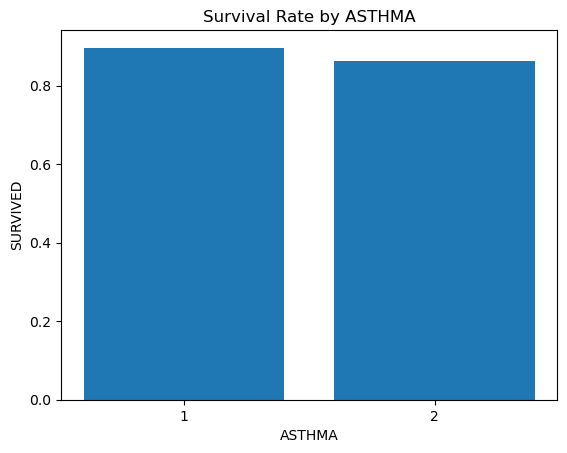

10317 patients were in group 1.
377279 patients were in group 2.


In [25]:
# ASTHMA Survival plot
ASTHMA_surv = []
for i in range(1, train_COVID.ASTHMA.max() + 1):
    surv = train_COVID[train_COVID.ASTHMA == i]["SURVIVED"] == 1
    ASTHMA_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.ASTHMA.max() + 1), ASTHMA_surv, tick_label=range(1, train_COVID.ASTHMA.max() + 1))
plt.xlabel("ASTHMA")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by ASTHMA")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.ASTHMA.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.ASTHMA == i]["SURVIVED"] == 1), i))

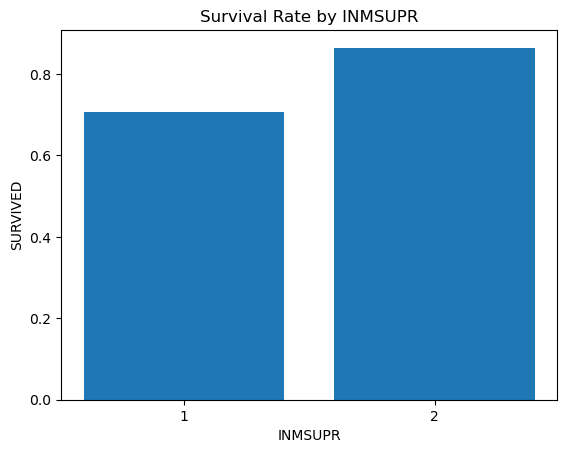

4719 patients were in group 1.
382877 patients were in group 2.


In [26]:
# INMSUPR Survival plot
INMSUPR_surv = []
for i in range(1, train_COVID.INMSUPR.max() + 1):
    surv = train_COVID[train_COVID.INMSUPR == i]["SURVIVED"] == 1
    INMSUPR_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.INMSUPR.max() + 1), INMSUPR_surv, tick_label=range(1, train_COVID.INMSUPR.max() + 1))
plt.xlabel("INMSUPR")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by INMSUPR")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.INMSUPR.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.INMSUPR == i]["SURVIVED"] == 1), i))

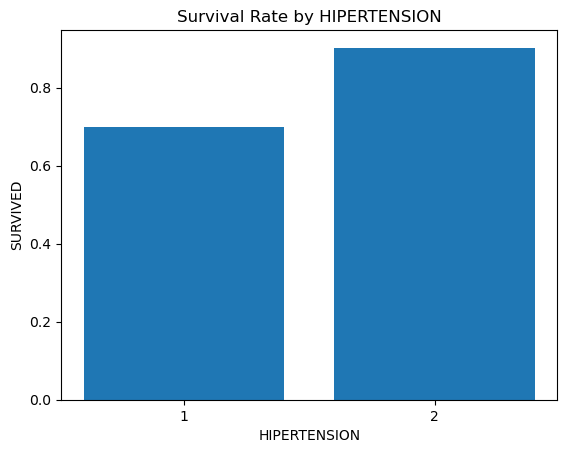

76064 patients were in group 1.
311532 patients were in group 2.


In [27]:
# HIPERTENSION Survival plot
HIPERTENSION_surv = []
for i in range(1, train_COVID.HIPERTENSION.max() + 1):
    surv = train_COVID[train_COVID.HIPERTENSION == i]["SURVIVED"] == 1
    HIPERTENSION_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.HIPERTENSION.max() + 1), HIPERTENSION_surv, tick_label=range(1, train_COVID.HIPERTENSION.max() + 1))
plt.xlabel("HIPERTENSION")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by HIPERTENSION")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.HIPERTENSION.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.HIPERTENSION == i]["SURVIVED"] == 1), i))

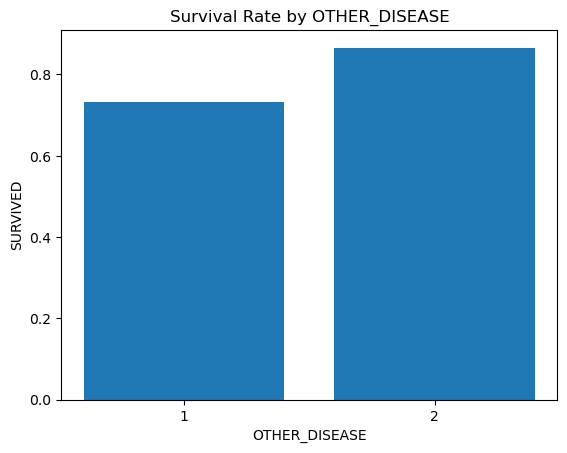

9937 patients were in group 1.
377659 patients were in group 2.


In [28]:
# OTHER_DISEASE Survival plot
OTHER_DISEASE_surv = []
for i in range(1, train_COVID.OTHER_DISEASE.max() + 1):
    surv = train_COVID[train_COVID.OTHER_DISEASE == i]["SURVIVED"] == 1
    OTHER_DISEASE_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.OTHER_DISEASE.max() + 1), OTHER_DISEASE_surv, tick_label=range(1, train_COVID.OTHER_DISEASE.max() + 1))
plt.xlabel("OTHER_DISEASE")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by OTHER_DISEASE")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.OTHER_DISEASE.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.OTHER_DISEASE == i]["SURVIVED"] == 1), i))

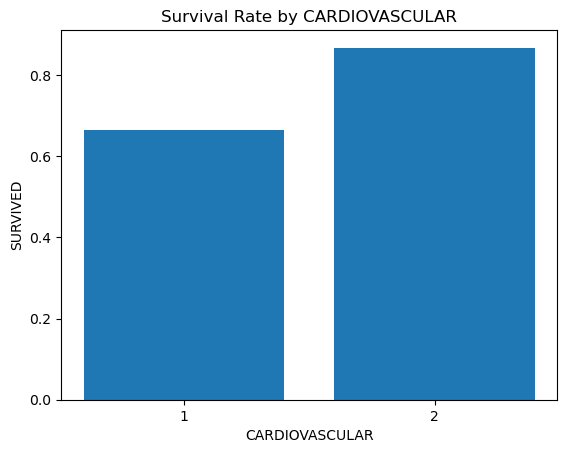

8401 patients were in group 1.
379195 patients were in group 2.


In [29]:
# CARDIOVASCULAR Survival plot
CARDIOVASCULAR_surv = []
for i in range(1, train_COVID.CARDIOVASCULAR.max() + 1):
    surv = train_COVID[train_COVID.CARDIOVASCULAR == i]["SURVIVED"] == 1
    CARDIOVASCULAR_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.CARDIOVASCULAR.max() + 1), CARDIOVASCULAR_surv, tick_label=range(1, train_COVID.CARDIOVASCULAR.max() + 1))
plt.xlabel("CARDIOVASCULAR")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by CARDIOVASCULAR")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.CARDIOVASCULAR.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.CARDIOVASCULAR == i]["SURVIVED"] == 1), i))

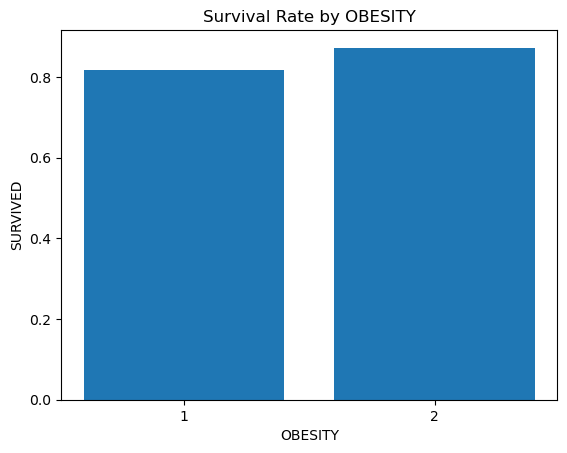

72089 patients were in group 1.
315507 patients were in group 2.


In [30]:
# OBESITY Survival plot
OBESITY_surv = []
for i in range(1, train_COVID.OBESITY.max() + 1):
    surv = train_COVID[train_COVID.OBESITY == i]["SURVIVED"] == 1
    OBESITY_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.OBESITY.max() + 1), OBESITY_surv, tick_label=range(1, train_COVID.OBESITY.max() + 1))
plt.xlabel("OBESITY")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by OBESITY")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.OBESITY.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.OBESITY == i]["SURVIVED"] == 1), i))

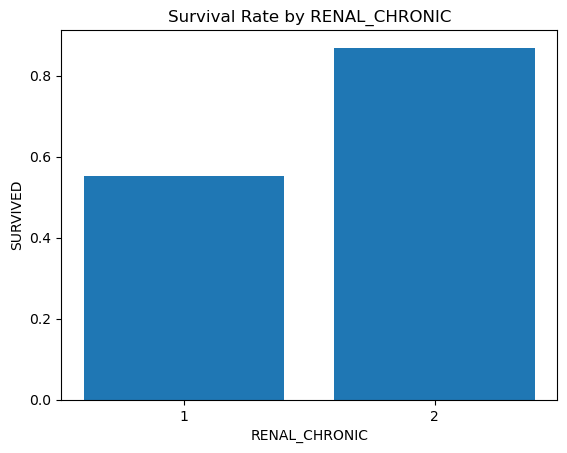

7881 patients were in group 1.
379715 patients were in group 2.


In [31]:
# RENAL_CHRONIC Survival plot
RENAL_CHRONIC_surv = []
for i in range(1, train_COVID.RENAL_CHRONIC.max() + 1):
    surv = train_COVID[train_COVID.RENAL_CHRONIC == i]["SURVIVED"] == 1
    RENAL_CHRONIC_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.RENAL_CHRONIC.max() + 1), RENAL_CHRONIC_surv, tick_label=range(1, train_COVID.RENAL_CHRONIC.max() + 1))
plt.xlabel("RENAL_CHRONIC")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by RENAL_CHRONIC")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.RENAL_CHRONIC.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.RENAL_CHRONIC == i]["SURVIVED"] == 1), i))

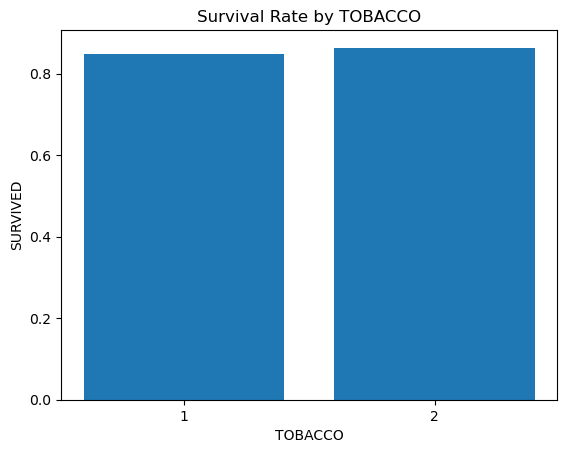

28494 patients were in group 1.
359102 patients were in group 2.


In [32]:
# TOBACCO Survival plot
TOBACCO_surv = []
for i in range(1, train_COVID.TOBACCO.max() + 1):
    surv = train_COVID[train_COVID.TOBACCO == i]["SURVIVED"] == 1
    TOBACCO_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.TOBACCO.max() + 1), TOBACCO_surv, tick_label=range(1, train_COVID.TOBACCO.max() + 1))
plt.xlabel("TOBACCO")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by TOBACCO")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.TOBACCO.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.TOBACCO == i]["SURVIVED"] == 1), i))

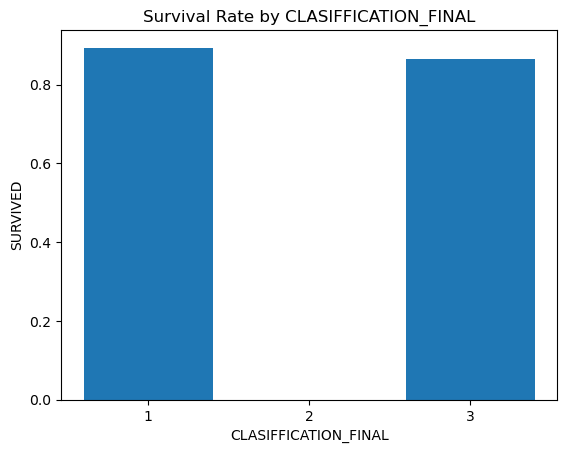

8417 patients were in group 1.
1801 patients were in group 2.
377378 patients were in group 3.


In [33]:
# CLASIFFICATION_FINAL Survival plot
CLASIFFICATION_FINAL_surv = []
for i in range(1, train_COVID.CLASIFFICATION_FINAL.max() + 1):
    surv = train_COVID[train_COVID.CLASIFFICATION_FINAL == i]["SURVIVED"] == 1
    CLASIFFICATION_FINAL_surv.append(sum(surv) / len(surv))

# Plot Survival rate for each value
plt.bar(range(1, train_COVID.CLASIFFICATION_FINAL.max() + 1), CLASIFFICATION_FINAL_surv, tick_label=range(1, train_COVID.CLASIFFICATION_FINAL.max() + 1))
plt.xlabel("CLASIFFICATION_FINAL")
plt.ylabel("SURVIVED")
plt.title("Survival Rate by CLASIFFICATION_FINAL")
plt.show()

# How many patients were in each group?
for i in range(1, train_COVID.CLASIFFICATION_FINAL.max() + 1):
    print("{} patients were in group {}.".format(len(train_COVID[train_COVID.CLASIFFICATION_FINAL == i]["SURVIVED"] == 1), i))

In [34]:
# Create X and y datasets
drop_cols = ['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'ASTHMA', 'OTHER_DISEASE', 'OBESITY', 'TOBACCO', 'CLASIFFICATION_FINAL']
X = train_COVID.drop(drop_cols, axis=1)
y = X.pop('SURVIVED').astype(dtype='int64')

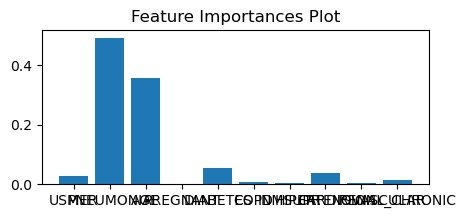

In [35]:
model = RandomForestClassifier()
model.fit(X, y)

# Check feature importance
plt.figure(figsize=(5, 2))
plt.bar(x=X.columns, height=model.feature_importances_)
plt.title("Feature Importances Plot")
plt.show()

0.8960119987478371
The model is 89.6% accurate on the training set.
The model is 88.6% accurate on the validation set.

The normalized confusion matrix is shown below:

The specificity, i.e., true negative rate or rate of correctly determining who will survive is 95.2%.
The false negative rate, i.e., number of people predicted to survive but didn't, is 52.9%.
The sensitivity, i.e., true positive rate or rate of correctly determining who will die / is high risk for dying is 47.1%.
The false positive rate, i.e., number of people predicted to die / be high risk for dying, is 4.8%.


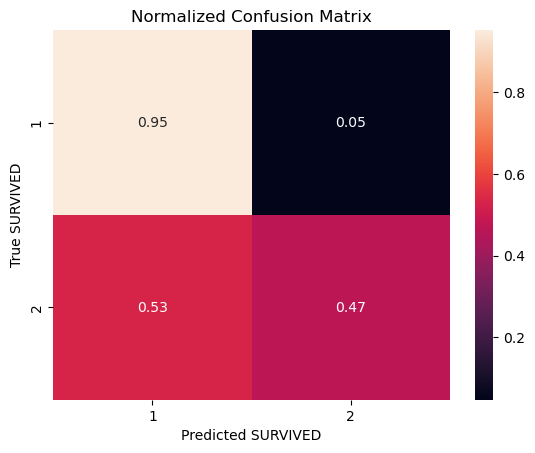

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Get predictions on validation data
preds = rf.predict(X_valid)

# Check accuracy
train_acc = rf.score(X_train, y_train)
print(train_acc)
valid_acc = sum(preds == y_valid) / len(preds)
print("The model is {}% accurate on the training set.".format(round(train_acc * 100, 1)))
print("The model is {}% accurate on the validation set.".format(round(valid_acc * 100, 1)))

# It is better to predict more people as going to die rather than as surviving. That way, hospitals will be more likely to use 
# valuable life-saving resources on more people who need it, than those who don't
cm = confusion_matrix(y_valid, preds, normalize='true')
print("\nThe normalized confusion matrix is shown below:\n")
sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=['1', '2'], yticklabels=['1', '2'])
plt.xlabel("Predicted SURVIVED")
plt.ylabel("True SURVIVED")
plt.title("Normalized Confusion Matrix")

# Check the structure of the confusion matrix
TN = sum((preds == 1) & (y_valid == 1))
FN = sum((preds == 1) & (y_valid == 2))
TP = sum((preds == 2) & (y_valid == 2))
FP = sum((preds == 2) & (y_valid == 1))
TNR = TN / (TN + FP)
FNR = FN / (FN + TP)
TPR = TP / (FN + TP)
FPR = FP / (TN + FP)
print("The specificity, i.e., true negative rate or rate of correctly determining who will survive is {}%.".format(round(TNR * 100, 1)))
print("The false negative rate, i.e., number of people predicted to survive but didn't, is {}%.".format(round(FNR * 100, 1)))
print("The sensitivity, i.e., true positive rate or rate of correctly determining who will die / is high risk for dying is {}%.".format(round(TPR * 100, 1)))
print("The false positive rate, i.e., number of people predicted to die / be high risk for dying, is {}%.".format(round(FPR * 100, 1)))

In [39]:
# Instantiate random sampler object and fit to create resampled data
rus = RandomUnderSampler(random_state=0)
X_res, y_res = rus.fit_resample(X, y)

# Check the shape of y_res for both SURVIVED == 1 and SURVIVED == 2
print("There are {} patients who survived in X_res.".format(sum(y_res == 1)))
print("There are {} patients who died in X_res.".format(sum(y_res == 2)))

There are 53322 patients who survived in X_res.
There are 53322 patients who died in X_res.


The model is 83.9% accurate on the training set.
The model is 84.1% accurate on the validation set.

The normalized confusion matrix is shown below:



Text(0.5, 1.0, 'Normalized Confusion Matrix')

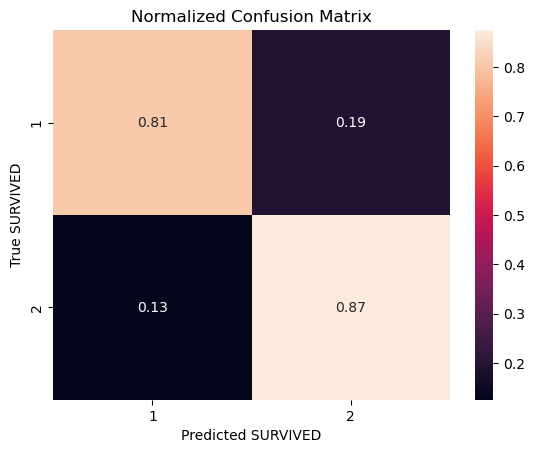

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X_res, y_res)
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train, y_train)

# Get predictions on validation data
preds = rf.predict(X_valid)

# Check accuracy
train_acc = rf.score(X_train, y_train)
valid_acc = sum(preds == y_valid) / len(preds)
print("The model is {}% accurate on the training set.".format(round(train_acc * 100, 1)))
print("The model is {}% accurate on the validation set.".format(round(valid_acc * 100, 1)))

# It is better to predict more people as going to die rather than as surviving. That way, hospitals will be more likely to use 
# valuable life-saving resources on more people who need it, than those who don't
cm = confusion_matrix(y_valid, preds, normalize='true')
print("\nThe normalized confusion matrix is shown below:\n")
sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=['1', '2'], yticklabels=['1', '2'])
plt.xlabel("Predicted SURVIVED")
plt.ylabel("True SURVIVED")
plt.title("Normalized Confusion Matrix")


The normalized confusion matrix is shown below:

The model is 84.9% accurate on the validation set.


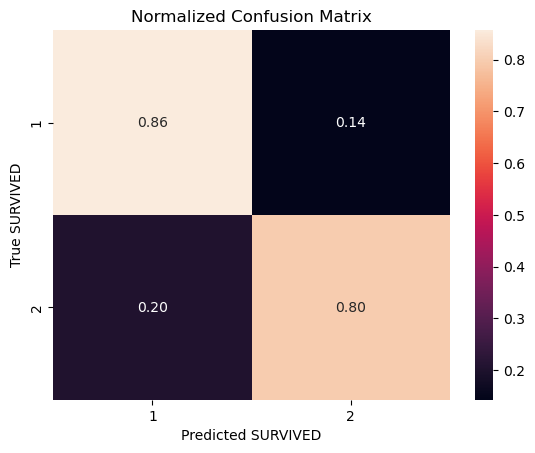

In [41]:
thresh = 0.8
probs = rf.predict_proba(X_valid)

# 1st column are probabilities for being in class 1 (survived)
# Create preds object and store as 1s probabilities > thresh; probs <= thresh are 0s
preds = (probs[:, 0] > thresh).astype("int64")

# Convert 0s in preds to 2s 
preds[preds == 0] = 2

cm = confusion_matrix(y_valid, preds, normalize='true')
print("\nThe normalized confusion matrix is shown below:\n")
sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=['1', '2'], yticklabels=['1', '2'])
plt.xlabel("Predicted SURVIVED")
plt.ylabel("True SURVIVED")
plt.title("Normalized Confusion Matrix")

valid_acc = sum(preds == y_valid) / len(preds)
print("The model is {}% accurate on the validation set.".format(round(valid_acc * 100, 1)))

In [44]:
# Confidence in the above analysis and conclusions should remain limited, however. It would be more useful to collect data from patients such as (1) symptoms the patient has experienced so far, (2) how many days since the first positive test were the data collected for this patient. These data would help us better understand what symptoms are related to increased chance of death, as well as when it is too soon to conclude a patient is going to be okay and can be sent home. It is recommended that additional research be conducted that includes data such as these.